<a href="https://colab.research.google.com/github/HumailShahzad/House_Price_Prediction/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
import numpy as np
from google.colab import files
x=files.upload()



Saving train.csv to train.csv


In [11]:
print(type(x))
print(list(x.keys())[0])

<class 'dict'>
train.csv


In [55]:
filename = list(x.keys())[0]
df = pd.read_csv(filename)
df.head()
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


Text(0.5, 1.0, 'SalePrice Distribution')

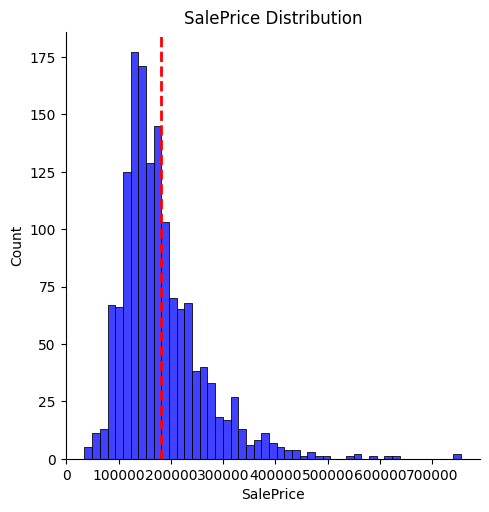

In [48]:
sns.displot(df['SalePrice'],color="blue")
plt.axvline(df['SalePrice'].mean(),color='red',linestyle='dashed',linewidth=2)
plt.title('SalePrice Distribution')


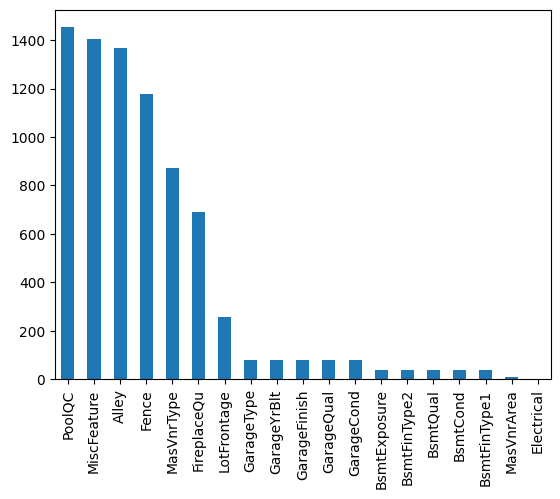

In [49]:
#Finding and Replacing null values
def plot_missing():
  missing=df.isna().sum()
  missing=missing[missing>0]
  missing = missing.sort_values(ascending = False)
  missing.plot.bar()
plot_missing()

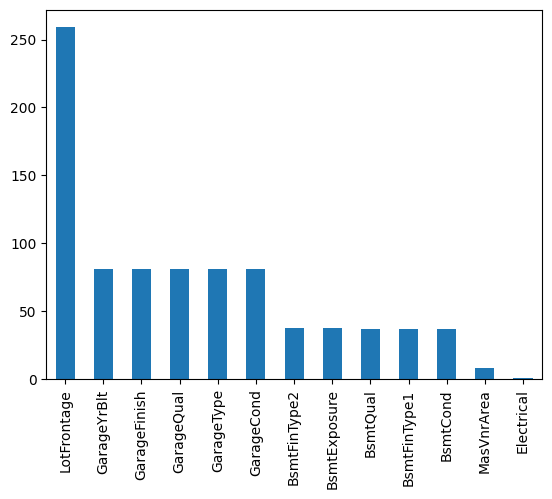

In [56]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu'],axis=1 , inplace=True)
plot_missing()

<Axes: >

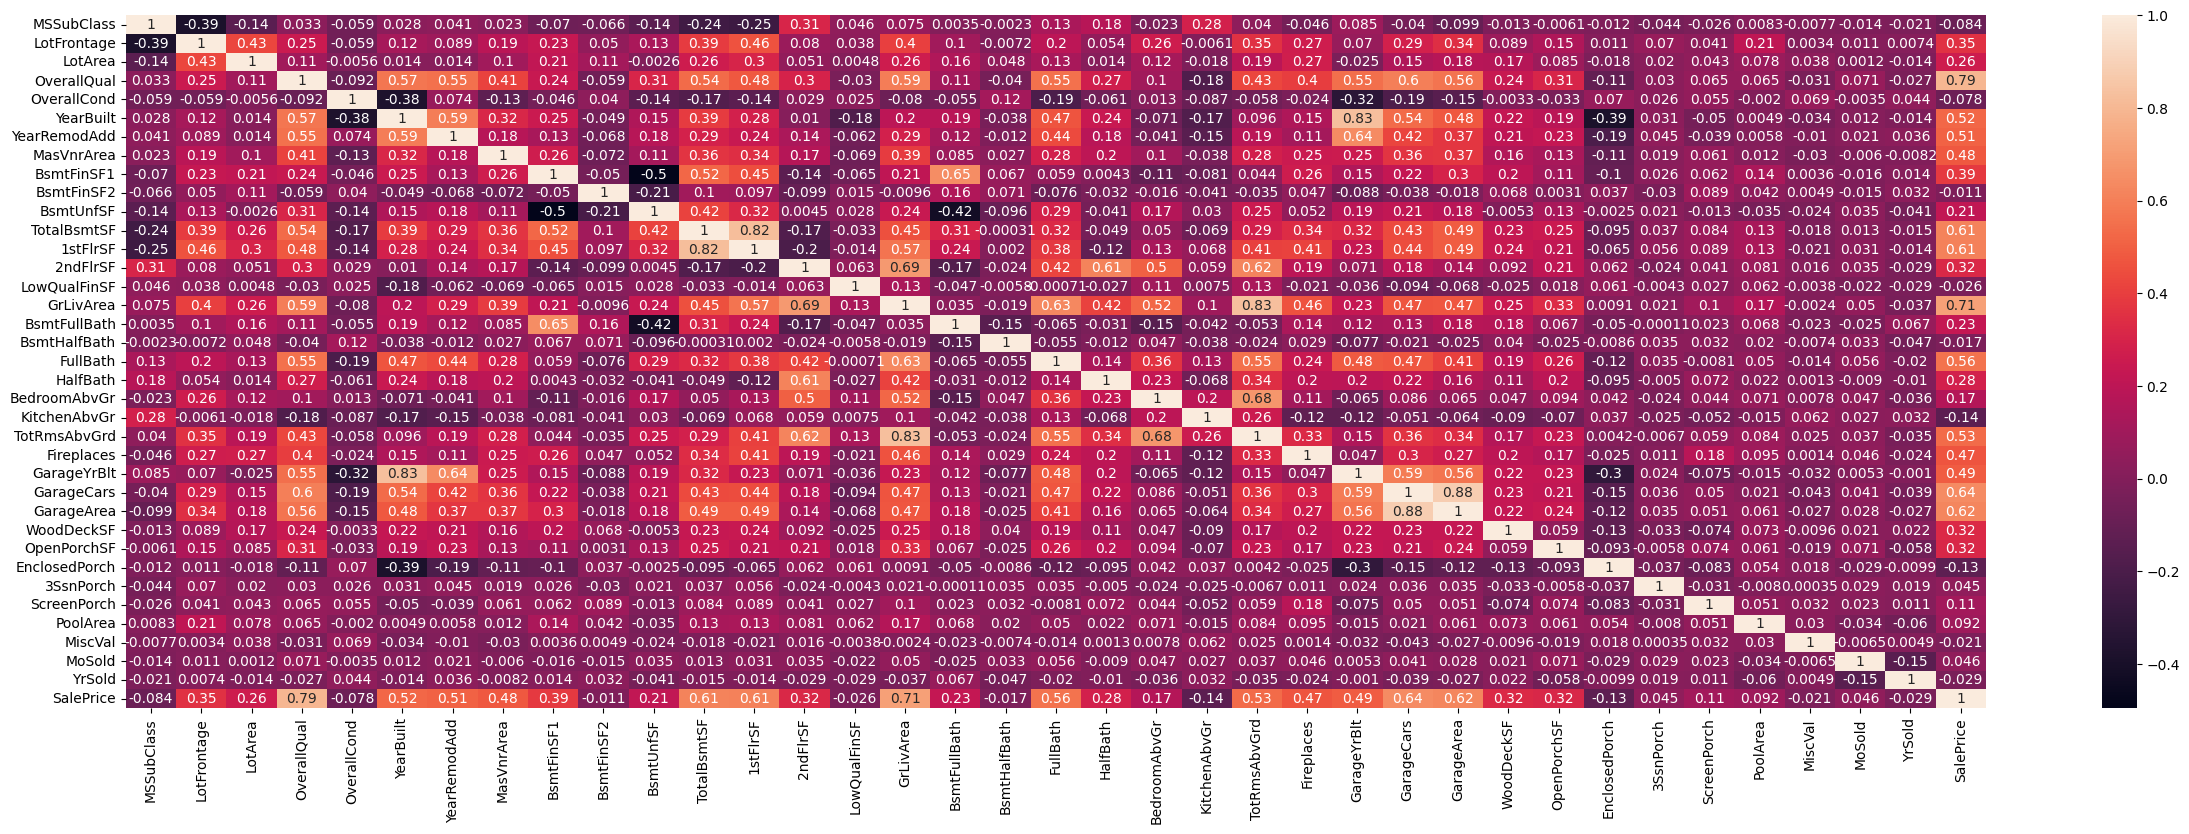

In [51]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(30,9))
sns.heatmap(numeric_df.corr(),annot=True)

In [57]:
num_col=[col for col in df if df[col].dtype in [float,int]]
print(num_col)
cat_col=[col for col in df if df[col].dtype in [object,str]]
print(cat_col)
df.head()

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleTy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [58]:
imputer = SimpleImputer()
scaler = MinMaxScaler()
X_train[num_col] = imputer.fit_transform(X_train[num_col])
X_test[num_col] = imputer.transform(X_test[num_col])
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
df[num_col]=SimpleImputer().fit_transform(df[num_col])
df[num_col]=MinMaxScaler().fit_transform(df[num_col])
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output
encoded_data = encoder.fit_transform(df[cat_col])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_col))
df = pd.concat([df.drop(cat_col, axis=1), encoded_df], axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
from sklearn.model_selection import train_test_split
X=df.drop(['SalePrice'],axis=1)
Y=df['SalePrice']

X_train,X_test , Y_train ,  Y_test= train_test_split(X, Y , test_size=0.2 , random_state=42)

In [62]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [69]:
from sklearn.metrics import mean_squared_error

models={
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}
for name,model in models.items():
  m=model.fit(X_train,Y_train)
  predicted=m.predict(X_test)
  mse=mean_squared_error(Y_test,predicted)
  rmse=np.sqrt(mse)
  print(name,rmse)


SVR 0.06658340414018367
XGBRegressor 0.035777361432593566
Ridge 0.04146587127868568
ElasticNet 0.12167620400793687
SGDRegressor 0.05275049665654652
BayesianRidge 0.042087417622273963
LinearRegression 0.04117424966062132
RandomForestRegressor 0.04003613583059715
